In [1]:
#título: Série temporal Arima ações starbucks
#autor: Fernando Schmitt

In [2]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
#visualizando dados primários e covertendo o histórico de dias faltantes 
data= pd.read_csv('Starbucks_stock_history.csv')
data['Date'] =  pd.to_datetime(data['Date'], format='%Y-%m-%d')
data = data.sort_values(by=['Date'], ascending=[True])
data.set_index('Date', inplace=True)
print (data)


                  Open        High         Low       Close     Volume  \
Date                                                                    
1992-06-26    0.270957    0.287086    0.264507    0.277409  224358400   
1992-06-29    0.280635    0.303215    0.274183    0.296763   58732800   
1992-06-30    0.303215    0.306440    0.283860    0.287086   34777600   
1992-07-01    0.290312    0.296763    0.280635    0.293538   18316800   
1992-07-02    0.296763    0.296763    0.287086    0.293538   13996800   
...                ...         ...         ...         ...        ...   
2021-09-27  113.610001  114.669998  112.910004  113.680000    3988800   
2021-09-28  112.680000  113.000000  111.080002  111.709999    5917700   
2021-09-29  111.900002  112.519997  111.570000  112.169998    4389100   
2021-09-30  111.519997  112.160004  110.309998  110.309998    5974500   
2021-10-01  110.889999  113.459999  110.540001  112.919998    5244849   

            Dividends  Stock Splits  
Date        

In [4]:
data = data.resample('D').ffill()
print (data)

                  Open        High         Low       Close     Volume  \
Date                                                                    
1992-06-26    0.270957    0.287086    0.264507    0.277409  224358400   
1992-06-27    0.270957    0.287086    0.264507    0.277409  224358400   
1992-06-28    0.270957    0.287086    0.264507    0.277409  224358400   
1992-06-29    0.280635    0.303215    0.274183    0.296763   58732800   
1992-06-30    0.303215    0.306440    0.283860    0.287086   34777600   
...                ...         ...         ...         ...        ...   
2021-09-27  113.610001  114.669998  112.910004  113.680000    3988800   
2021-09-28  112.680000  113.000000  111.080002  111.709999    5917700   
2021-09-29  111.900002  112.519997  111.570000  112.169998    4389100   
2021-09-30  111.519997  112.160004  110.309998  110.309998    5974500   
2021-10-01  110.889999  113.459999  110.540001  112.919998    5244849   

            Dividends  Stock Splits  
Date        

In [5]:
#Mostra os estilos de colorização de gráficos disponíveis
#print(plt.style.available)

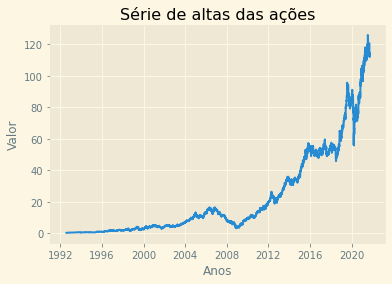

In [6]:
#criando a série com o histórico da altas atravéz dos anos
ts= data['High'] 
plt.style.use('Solarize_Light2')
plt.title("Série de altas das ações")
plt.xlabel("Anos")
plt.ylabel("Valor")
plt.plot(ts)

In [7]:
#criando modelo ARIMA
modelo= ARIMA(ts, order= (1,1,1), freq= ts.index.inferred_freq)
treinado= modelo.fit()
treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                10690
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5901.012
Date:                Wed, 09 Mar 2022   AIC                          11808.024
Time:                        12:01:25   BIC                          11829.855
Sample:                    06-26-1992   HQIC                         11815.389
                         - 10-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0324      0.080      0.407      0.684      -0.124       0.188
ma.L1          0.0075      0.079      0.095      0.924      -0.148       0.163
sigma2         0.1766      0.000    451.461      0.000       0.176       0.177
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2833414.94
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):             148.47   Skew:                             0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        82.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
previsoes= treinado.forecast(steps=20)
previsoes

2021-10-02    113.511972
2021-10-03    113.513655
2021-10-04    113.513710
2021-10-05    113.513711
2021-10-06    113.513712
2021-10-07    113.513712
2021-10-08    113.513712
2021-10-09    113.513712
2021-10-10    113.513712
2021-10-11    113.513712
2021-10-12    113.513712
2021-10-13    113.513712
2021-10-14    113.513712
2021-10-15    113.513712
2021-10-16    113.513712
2021-10-17    113.513712
2021-10-18    113.513712
2021-10-19    113.513712
2021-10-20    113.513712
2021-10-21    113.513712
Freq: D, Name: predicted_mean, dtype: float64

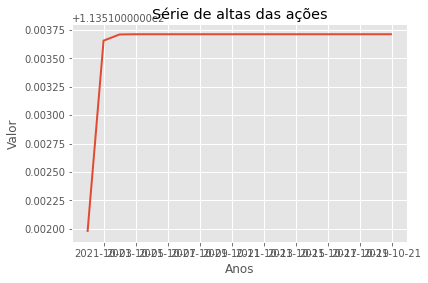

In [9]:
plt.style.use('ggplot')
plt.title("Série de altas das ações")
plt.xlabel("Anos")
plt.ylabel("Valor")
plt.plot(previsoes)

In [10]:
#utilizando o auto ARIMA para previsão de 6 periodos
auto= auto_arima(ts, m=6, seasonal= True, trace= True)
auto.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[6]             : AIC=inf, Time=20.16 sec
 ARIMA(0,2,0)(0,0,0)[6]             : AIC=18789.502, Time=0.43 sec
 ARIMA(1,2,0)(1,0,0)[6]             : AIC=15974.811, Time=0.92 sec
 ARIMA(0,2,1)(0,0,1)[6]             : AIC=inf, Time=3.11 sec
 ARIMA(1,2,0)(0,0,0)[6]             : AIC=15991.077, Time=0.35 sec
 ARIMA(1,2,0)(2,0,0)[6]             : AIC=15976.312, Time=1.77 sec
 ARIMA(1,2,0)(1,0,1)[6]             : AIC=15975.490, Time=2.40 sec
 ARIMA(1,2,0)(0,0,1)[6]             : AIC=15974.550, Time=0.92 sec
 ARIMA(1,2,0)(0,0,2)[6]             : AIC=15976.028, Time=1.90 sec
 ARIMA(1,2,0)(1,0,2)[6]             : AIC=15977.487, Time=4.42 sec
 ARIMA(0,2,0)(0,0,1)[6]             : AIC=18790.483, Time=0.62 sec
 ARIMA(2,2,0)(0,0,1)[6]             : AIC=15107.982, Time=1.11 sec
 ARIMA(2,2,0)(0,0,0)[6]             : AIC=15123.694, Time=0.41 sec
 ARIMA(2,2,0)(1,0,1)[6]             : AIC=15107.610, Time=3.12 sec
 ARIMA(2,2,0)(1,0,0)[6]       

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                10690
Model:             SARIMAX(3, 2, 0)x(2, 0, [1, 2], 6)   Log Likelihood               -7236.938
Date:                                Wed, 09 Mar 2022   AIC                          14489.877
Time:                                        12:05:59   BIC                          14548.092
Sample:                                             0   HQIC                         14509.517
                                              - 10690                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6843      0.002   -311.273      0.000      -0.689      -0.680
ar.L2         -0.4271      0.003   -129.043      0.000      -0.434      -0.421
ar.L3         -0.2370      0.002   -119.381      0.000      -0.241      -0.233
ar.S.L6        0.2820      0.161      1.752      0.080      -0.034       0.598
ar.S.L12       0.3877      0.092      4.201      0.000       0.207       0.569
ma.S.L6       -0.2442      0.160     -1.523      0.128      -0.558       0.070
ma.S.L12      -0.3959      0.088     -4.478      0.000      -0.569      -0.223
sigma2         0.2268      0.001    381.368      0.000       0.226       0.228
===================================================================================
Ljung-Box (L1) (Q):                  39.50   Jarque-Bera (JB):           2430186.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             148.94   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        76.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
pred= auto.predict(n_periods= 12)
pred

array([113.27166473, 113.31378523, 113.36618496, 113.68573955,
       113.79365928, 114.0119508 , 114.15114453, 114.37882013,
       114.55424526, 114.75898713, 114.95375945, 115.14713694])

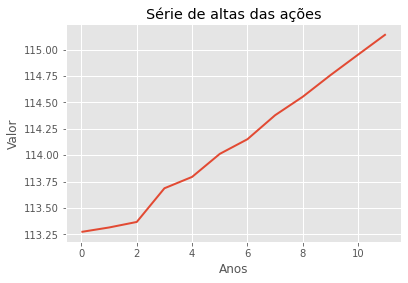

In [12]:
plt.style.use('ggplot')
plt.title("Série de altas das ações")
plt.xlabel("Anos")
plt.ylabel("Valor")
plt.plot(pred)